In [1]:
from shubov_algorithms import support_vector_machine,helpers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#  support vector machine (task: skin pixels)

In [2]:
def test_svm(features, targets, epochs=100, svm_lambda=1, print_stat=False):

    ## split features into test and train datasets
    features_train, features_test = helpers.split_data(features)

    ## split targets into test and train datasets
    target_train, target_test = helpers.split_data(targets)

    ## number of features
    number_of_features = len(features_train[0])

    ## hyper parameters for SVM
    lmbd = svm_lambda
    D = number_of_features

    model = support_vector_machine.SVM(lmbd, D, iterator)

    model.learn(features_train, target_train)

    loss, accuracy, true_positives, true_negatives = model.test(features_test, target_test)
    
    if print_stat:
        print('Accuracy', round(accuracy, 2))
        print('True Positives', round(true_positives, 2))
        print('True Negatives', round(true_negatives, 2))
        print('Loss', round(loss, 2))
        
    return loss,accuracy,true_positives,true_negatives

### iterator function

In [3]:
def iterator(x, y):
    ## iterator function passed to SVM to read dataset by one sample

    for i in range(len(x)):
        x_bias = x[i] + [1.]  # inputs + bias
        yield i+1, x_bias, y[i]

### dataset

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt"
data_frame_data = pd.read_csv(url, header = None, sep='\t')
data_frame_data.head()

,0,1,2,3
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [5]:
np_data = data_frame_data.to_numpy()
np.random.shuffle(np_data)
features = np_data[:,0:3]
targets = data = [1 if (y == 2) else -1 for y in np_data[:,3]]

### test

In [6]:
test_svm(features, targets, epochs=50, svm_lambda=1, print_stat=True)

Accuracy 0.9
True Positives 0.88
True Negatives 1.0
Loss 0.38


(0.3842279628827226, 0.9021586843859244, 0.8765256201184448, 1.0)

### test with different lambdas

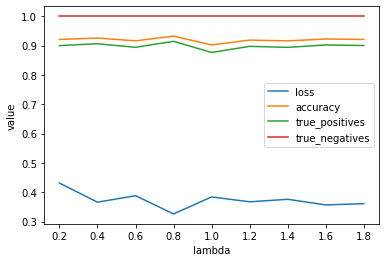

In [7]:
list_loss=[]
list_accuracy=[]
list_true_positives=[]
list_true_negatives=[]

lambdas = np.arange(0.2, 2, 0.2)

for lmbd in lambdas:
    
    loss, accuracy, true_positives, true_negatives = test_svm(features, targets, epochs=3, svm_lambda=lmbd)
    
    list_loss.append(loss)
    list_accuracy.append(accuracy)
    list_true_positives.append(true_positives)
    list_true_negatives.append(true_negatives)
    
plt.plot(lambdas, list_loss,label="loss")
plt.plot(lambdas, list_accuracy, label="accuracy")
plt.plot(lambdas, list_true_positives, label="true_positives")
plt.plot(lambdas, list_true_negatives, label="true_negatives")
plt.ylabel('value')
plt.xlabel('lambda')
plt.legend()

